### This is my best non-polynomial model

**Categorical:**
LabelEncoder for all nominal data

map for all ordinal data

**Numerical**
Fill NA with mean from column

In [140]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

### Read in both Training CSV and Test CSV for Kaggle

In [141]:
modelnum = 'eight'

In [142]:
# read in Training csv
df = pd.read_csv('../../datasets/train.csv')
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [143]:
# Read in Test CSV for Kaggle
df_test = pd.read_csv('../../datasets/test.csv')
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,Fa,1020,0,0,Unf,Unf,N,Norm,Norm,FuseP,112,Fa,TA,AsbShng,AsbShng,NaN,NaN,0,Stone,2,Typ,440,1,Po,Unf,Po,Detchd,1910.0,1928,0,GasA,Gd,2Story,2658,2,Fa,Lvl,Gtl,9142,Inside,69.0,Reg,0,190,RM,0.0,None,NaN,0,4,OldTown,60,8,6,902301120,Y,0,NaN,CompShg,Gable,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006
1,1967,0,0,NaN,6,Duplex,TA,No,0,0,Gd,1967,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,NaN,0,CBlock,2,Typ,580,2,TA,Fin,TA,Attchd,1977.0,1967,0,GasA,TA,1Story,2718,2,TA,Lvl,Gtl,9662,Inside,NaN,IR1,0,90,RL,0.0,None,NaN,0,8,Sawyer,0,4,5,905108090,Y,0,NaN,CompShg,Gable,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006
2,664,832,0,NaN,3,1Fam,Gd,Av,1,0,Gd,100,554,0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,426,2,TA,RFn,TA,Attchd,2006.0,1496,1,GasA,Ex,2Story,2414,1,Gd,Lvl,Gtl,17104,Inside,58.0,IR1,0,60,RL,0.0,None,NaN,0,9,Gilbert,24,5,7,528218130,Y,0,NaN,CompShg,Gable,New,0,Pave,7,654,AllPub,100,2006,2006,2006
3,968,0,0,NaN,2,1Fam,TA,No,0,0,TA,968,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,184,TA,Gd,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,480,2,TA,Unf,Fa,Detchd,1935.0,968,0,GasA,TA,1Story,1989,1,TA,Lvl,Gtl,8520,Inside,60.0,Reg,0,30,RM,0.0,None,NaN,0,7,OldTown,0,6,5,902207150,N,0,NaN,CompShg,Gable,WD,0,Pave,5,968,AllPub,0,1923,2006,2007
4,1394,0,0,NaN,3,1Fam,TA,No,1,0,Gd,785,609,0,BLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,CBlock,1,Typ,514,2,TA,RFn,TA,Attchd,1963.0,1394,1,GasA,Gd,1Story,625,1,TA,Lvl,Gtl,9500,Inside,NaN,IR1,0,20,RL,247.0,BrkFace,NaN,0,7,NAmes,76,5,6,535105100,Y,0,NaN,CompShg,Gable,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009


### Useful for EDA

In [144]:
# Run to see all columns in df
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [145]:
# Convert column names to lowercase
df.columns = map(str.lower,df.columns)
# Replace ' ' with '_' in column names
df.columns = df.columns.str.replace(' ','_')
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,ms_subclass,ms_zoning,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,neighborhood,open_porch_sf,overall_cond,overall_qual,pid,paved_drive,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


### Identify Features to Use

#### Features:

neigh_mean_sq_ft

Bed and Bathroom

In [146]:
# To Training df

# Convert column names to lowercase
df.columns = map(str.lower,df.columns)
# Replace ' ' with '_' in column names
df.columns = df.columns.str.replace(' ','_')
df.head()

df['alley'] = le.fit_transform(df['alley'])
df['bldg_type'] = le.fit_transform(df['bldg_type'])
df['central_air'] = le.fit_transform(df['central_air'])
df['condition_1'] = le.fit_transform(df['condition_1'])
df['condition_2'] = le.fit_transform(df['condition_2'])
df['electrical'] = le.fit_transform(df['electrical'])
df['exterior_1st'] = le.fit_transform(df['exterior_1st'])
df['exterior_2nd'] = le.fit_transform(df['exterior_2nd'])
df['foundation'] = le.fit_transform(df['foundation'])
df['garage_finish'] = le.fit_transform(df['garage_finish'])
df['garage_type'] = le.fit_transform(df['garage_type'])
df['heating'] = le.fit_transform(df['heating'])
df['house_style'] = le.fit_transform(df['house_style'])
df['land_contour'] = le.fit_transform(df['land_contour'])
df['lot_config'] = le.fit_transform(df['lot_config'])
df['ms_zoning'] = le.fit_transform(df['ms_zoning'])
df['mas_vnr_type'] = le.fit_transform(df['mas_vnr_type'])
df['misc_feature'] = le.fit_transform(df['misc_feature'])
df['neighborhood'] = le.fit_transform(df['neighborhood'])
df['roof_matl'] = le.fit_transform(df['roof_matl'])
df['roof_style'] = le.fit_transform(df['roof_style'])
df['sale_type'] = le.fit_transform(df['sale_type'])
df['street'] = le.fit_transform(df['street'])

df['kitchen_qual_num'] = df['kitchen_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df['land_slope_num'] = df['land_slope'].map({'Gtl': 2, 'Mod':1, 'Sev': 0})
df['exter_qual_num'] = df['exter_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Po':0})
df['exter_cond_num'] = df['exter_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Po':0})
df['bsmt_qual_num'] = df['bsmt_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['bsmt_cond_num'] = df['bsmt_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['bsmt_exposure_num'] = df['bsmt_exposure'].map({'Gd': 5, 'Av':4, 'Mn': 3, 'No':2, 'NA':1})
df['bsmtfin_type_1_num'] = df['bsmtfin_type_1'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df['bsmtfin_type_2_num'] = df['bsmtfin_type_2'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df['heating_qc_num'] = df['heating_qc'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['electrical_num'] = df['electrical'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['functional_num'] = df['functional'].map({'Typ': 7, 'Min2':6, 'Min1': 5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df['fireplace_qu_num'] = df['fireplace_qu'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['garage_qual_num'] = df['garage_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['garage_cond_num'] = df['garage_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df['paved_drive_num'] = df['paved_drive'].map({'Y': 2, 'P':1, 'N': 0})
df['pool_qc_num'] = df['pool_qc'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'NA':1})
df['fence_num'] = df['fence'].map({'GdPrv': 5, 'MnPrv':4, 'GdWo': 3, 'MnWw':2, 'NA':1})
df['lot_shape_num'] = df['lot_shape'].map({'Reg': 3, 'IR1':2, 'IR2': 1, 'IR3':0})
df['utilities_num'] = df['utilities'].map({'AllPub': 3, 'NoSewr':2, 'NoSeWa': 1, 'ELO':0})

In [147]:
# To Test df

# Convert column names to lowercase
df_test.columns = map(str.lower,df_test.columns)
# Replace ' ' with '_' in column names
df_test.columns = df_test.columns.str.replace(' ','_')
df_test.head()

df_test['alley'] = le.fit_transform(df_test['alley'])
df_test['bldg_type'] = le.fit_transform(df_test['bldg_type'])
df_test['central_air'] = le.fit_transform(df_test['central_air'])
df_test['condition_1'] = le.fit_transform(df_test['condition_1'])
df_test['condition_2'] = le.fit_transform(df_test['condition_2'])
df_test['electrical'] = le.fit_transform(df_test['electrical'])
df_test['exterior_1st'] = le.fit_transform(df_test['exterior_1st'])
df_test['exterior_2nd'] = le.fit_transform(df_test['exterior_2nd'])
df_test['foundation'] = le.fit_transform(df_test['foundation'])
df_test['garage_finish'] = le.fit_transform(df_test['garage_finish'])
df_test['garage_type'] = le.fit_transform(df_test['garage_type'])
df_test['heating'] = le.fit_transform(df_test['heating'])
df_test['house_style'] = le.fit_transform(df_test['house_style'])
df_test['land_contour'] = le.fit_transform(df_test['land_contour'])
df_test['lot_config'] = le.fit_transform(df_test['lot_config'])
df_test['ms_zoning'] = le.fit_transform(df_test['ms_zoning'])
df_test['mas_vnr_type'] = le.fit_transform(df_test['mas_vnr_type'])
df_test['misc_feature'] = le.fit_transform(df_test['misc_feature'])
df_test['neighborhood'] = le.fit_transform(df_test['neighborhood'])
df_test['roof_matl'] = le.fit_transform(df_test['roof_matl'])
df_test['roof_style'] = le.fit_transform(df_test['roof_style'])
df_test['sale_type'] = le.fit_transform(df_test['sale_type'])
df_test['street'] = le.fit_transform(df_test['street'])

df_test['kitchen_qual_num'] = df_test['kitchen_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['land_slope_num'] = df_test['land_slope'].map({'Gtl': 2, 'Mod':1, 'Sev': 0})
df_test['exter_qual_num'] = df_test['exter_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Po':0})
df_test['exter_cond_num'] = df_test['exter_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'Po':0})
df_test['bsmt_qual_num'] = df_test['bsmt_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['bsmt_cond_num'] = df_test['bsmt_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['bsmt_exposure_num'] = df_test['bsmt_exposure'].map({'Gd': 5, 'Av':4, 'Mn': 3, 'No':2, 'NA':1})
df_test['bsmtfin_type_1_num'] = df_test['bsmtfin_type_1'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_test['bsmtfin_type_2_num'] = df_test['bsmtfin_type_2'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_test['heating_qc_num'] = df_test['heating_qc'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['electrical_num'] = df_test['electrical'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['functional_num'] = df_test['functional'].map({'Typ': 7, 'Min2':6, 'Min1': 5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_test['fireplace_qu_num'] = df_test['fireplace_qu'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['garage_qual_num'] = df_test['garage_qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['garage_cond_num'] = df_test['garage_cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})
df_test['paved_drive_num'] = df_test['paved_drive'].map({'Y': 2, 'P':1, 'N': 0})
df_test['pool_qc_num'] = df_test['pool_qc'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'NA':1})
df_test['fence_num'] = df_test['fence'].map({'GdPrv': 5, 'MnPrv':4, 'GdWo': 3, 'MnWw':2, 'NA':1})
df_test['lot_shape_num'] = df_test['lot_shape'].map({'Reg': 3, 'IR1':2, 'IR2': 1, 'IR3':0})
df_test['utilities_num'] = df_test['utilities'].map({'AllPub': 3, 'NoSewr':2, 'NoSeWa': 1, 'ELO':0})

In [148]:
# Replace NA with mean
# To Training

df['bsmt_cond_num'] = df['bsmt_cond_num'].fillna(df['bsmt_cond_num'].mean())
df['bsmt_exposure_num'] = df['bsmt_exposure_num'].fillna(df['bsmt_exposure_num'].mean())
df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(df['bsmt_full_bath'].mean())
df['bsmt_half_bath'] = df['bsmt_half_bath'].fillna(df['bsmt_half_bath'].mean())
df['bsmt_qual_num'] = df['bsmt_qual_num'].fillna(df['bsmt_qual_num'].mean())
df['bsmt_unf_sf'] = df['bsmt_unf_sf'].fillna(df['bsmt_unf_sf'].mean())
df['bsmtfin_sf_1'] = df['bsmtfin_sf_1'].fillna(df['bsmtfin_sf_1'].mean())
df['bsmtfin_sf_2'] = df['bsmtfin_sf_2'].fillna(df['bsmtfin_sf_2'].mean())
df['bsmtfin_type_1_num'] = df['bsmtfin_type_1_num'].fillna(df['bsmtfin_type_1_num'].mean())
df['bsmtfin_type_2_num'] = df['bsmtfin_type_2_num'].fillna(df['bsmtfin_type_2_num'].mean())
df['garage_area'] = df['garage_area'].fillna(df['garage_area'].mean())
df['garage_cars'] = df['garage_cars'].fillna(df['garage_cars'].mean())
df['garage_cond_num'] = df['garage_cond_num'].fillna(df['garage_cond_num'].mean())
df['garage_qual_num'] = df['garage_qual_num'].fillna(df['garage_qual_num'].mean())
df['garage_yr_blt'] = df['garage_yr_blt'].fillna(df['garage_yr_blt'].mean())
df['mas_vnr_area'] = df['mas_vnr_area'].fillna(df['mas_vnr_area'].mean())
df['fireplace_qu_num'] = df['fireplace_qu_num'].fillna(df['fireplace_qu_num'].mean())
df['lot_frontage'] = df['lot_frontage'].fillna(df['lot_frontage'].mean())
df['total_bsmt_sf'] = df['total_bsmt_sf'].fillna(df['total_bsmt_sf'].mean())

# To Testing

df_test['bsmt_cond_num'] = df_test['bsmt_cond_num'].fillna(df_test['bsmt_cond_num'].mean())
df_test['bsmt_exposure_num'] = df_test['bsmt_exposure_num'].fillna(df_test['bsmt_exposure_num'].mean())
df_test['bsmt_full_bath'] = df_test['bsmt_full_bath'].fillna(df_test['bsmt_full_bath'].mean())
df_test['bsmt_half_bath'] = df_test['bsmt_half_bath'].fillna(df_test['bsmt_half_bath'].mean())
df_test['bsmt_qual_num'] = df_test['bsmt_qual_num'].fillna(df_test['bsmt_qual_num'].mean())
df_test['bsmt_unf_sf'] = df_test['bsmt_unf_sf'].fillna(df_test['bsmt_unf_sf'].mean())
df_test['bsmtfin_sf_1'] = df_test['bsmtfin_sf_1'].fillna(df_test['bsmtfin_sf_1'].mean())
df_test['bsmtfin_sf_2'] = df_test['bsmtfin_sf_2'].fillna(df_test['bsmtfin_sf_2'].mean())
df_test['bsmtfin_type_1_num'] = df_test['bsmtfin_type_1_num'].fillna(df_test['bsmtfin_type_1_num'].mean())
df_test['bsmtfin_type_2_num'] = df_test['bsmtfin_type_2_num'].fillna(df_test['bsmtfin_type_2_num'].mean())
df_test['garage_area'] = df_test['garage_area'].fillna(df_test['garage_area'].mean())
df_test['garage_cars'] = df_test['garage_cars'].fillna(df_test['garage_cars'].mean())
df_test['garage_cond_num'] = df_test['garage_cond_num'].fillna(df_test['garage_cond_num'].mean())
df_test['garage_qual_num'] = df_test['garage_qual_num'].fillna(df_test['garage_qual_num'].mean())
df_test['garage_yr_blt'] = df_test['garage_yr_blt'].fillna(df_test['garage_yr_blt'].mean())
df_test['mas_vnr_area'] = df_test['mas_vnr_area'].fillna(df_test['mas_vnr_area'].mean())
df_test['fireplace_qu_num'] = df_test['fireplace_qu_num'].fillna(df_test['fireplace_qu_num'].mean())
df_test['lot_frontage'] = df_test['lot_frontage'].fillna(df_test['lot_frontage'].mean())
df_test['total_bsmt_sf'] = df_test['total_bsmt_sf'].fillna(df_test['total_bsmt_sf'].mean())

In [149]:
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df = df.reindex(sorted(df.columns), axis=1)

### Time to Dive into the Data!!!

#### Feature Engineering Happens RIGHT Here!!

In [150]:
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_cond_num,bsmt_exposure,bsmt_exposure_num,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_qual_num,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_1_num,bsmtfin_type_2,bsmtfin_type_2_num,central_air,condition_1,condition_2,electrical,electrical_num,enclosed_porch,exter_cond,exter_cond_num,exter_qual,exter_qual_num,exterior_1st,exterior_2nd,fence,fence_num,fireplace_qu,fireplace_qu_num,fireplaces,foundation,full_bath,functional,functional_num,garage_area,garage_cars,garage_cond,garage_cond_num,garage_finish,garage_qual,garage_qual_num,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,heating_qc_num,house_style,id,kitchen_abvgr,kitchen_qual,kitchen_qual_num,land_contour,land_slope,land_slope_num,lot_area,lot_config,lot_frontage,lot_shape,lot_shape_num,low_qual_fin_sf,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,ms_subclass,ms_zoning,neighborhood,open_porch_sf,overall_cond,overall_qual,paved_drive,paved_drive_num,pid,pool_area,pool_qc,pool_qc_num,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,total_bsmt_sf,totrms_abvgrd,utilities,utilities_num,wood_deck_sf,year_built,year_remod/add,yr_sold
0,725,754,0,2,3,0,TA,3.0,No,2.0,0.0,0.0,TA,3.0,192.0,533.0,0.0,GLQ,6.0,Unf,1.0,1,5,2,4,NaN,0,TA,3,Gd,4,6,9,NaN,NaN,NaN,3.441484,0,1,2,Typ,7,475.0,2.0,TA,3.0,1,TA,3.0,1,1976.0,1479,1,0,Ex,5,5,109,1,Gd,4,3,Gtl,2,13517,1,69.0552,IR1,2,0,289.0,1,5,0,3,60,5,22,44,8,6,Y,2,533352170,0,NaN,NaN,1,1,8,130500,0,1,725.0,6,AllPub,3,0,1976,2005,2010
1,913,1209,0,2,4,0,TA,3.0,No,2.0,1.0,0.0,Gd,4.0,276.0,637.0,0.0,GLQ,6.0,Unf,1.0,1,2,2,4,NaN,0,TA,3,Gd,4,12,12,NaN,NaN,TA,3.000000,1,2,2,Typ,7,559.0,2.0,TA,3.0,1,TA,3.0,1,1997.0,2122,1,0,Ex,5,5,544,1,Gd,4,3,Gtl,2,11492,1,43.0000,IR1,2,0,132.0,1,5,0,4,60,5,23,74,5,7,Y,2,531379050,0,NaN,NaN,1,1,8,220000,0,1,913.0,8,AllPub,3,0,1996,1997,2009
2,1057,0,0,2,3,0,TA,3.0,No,2.0,1.0,0.0,TA,3.0,326.0,731.0,0.0,GLQ,6.0,Unf,1.0,1,2,2,4,NaN,0,Gd,4,TA,3,12,12,NaN,NaN,NaN,3.441484,0,1,1,Typ,7,246.0,1.0,TA,3.0,2,TA,3.0,5,1953.0,1057,0,0,TA,3,2,153,1,Gd,4,3,Gtl,2,7922,4,68.0000,Reg,3,0,0.0,2,5,0,1,20,5,15,52,7,5,Y,2,535304180,0,NaN,NaN,1,1,8,109000,0,1,1057.0,5,AllPub,3,0,1953,2007,2010
3,744,700,0,2,3,0,TA,3.0,No,2.0,0.0,0.0,Gd,4.0,384.0,0.0,0.0,Unf,1.0,Unf,1.0,1,2,2,4,NaN,0,TA,3,TA,3,12,12,NaN,NaN,NaN,3.441484,0,2,2,Typ,7,400.0,2.0,TA,3.0,0,TA,3.0,3,2007.0,1444,1,0,Gd,4,5,318,1,TA,3,3,Gtl,2,9802,4,73.0000,Reg,3,0,0.0,2,5,0,4,60,5,26,0,5,5,Y,2,916386060,0,NaN,NaN,1,1,8,174000,0,1,384.0,7,AllPub,3,100,2006,2007,2010
4,831,614,0,2,3,0,Gd,4.0,No,2.0,0.0,0.0,Fa,2.0,676.0,0.0,0.0,Unf,1.0,Unf,1.0,1,2,2,4,NaN,0,TA,3,TA,3,13,9,NaN,NaN,NaN,3.441484,0,2,2,Typ,7,484.0,2.0,TA,3.0,2,TA,3.0,5,1957.0,1445,0,0,TA,3,0,255,1,TA,3,3,Gtl,2,14235,4,82.0000,IR1,2,0,0.0,2,5,0,3,50,5,23,59,8,6,N,0,906425045,0,NaN,NaN,1,1,8,138500,0,1,676.0,6,AllPub,3,0,1900,1993,2010


In [151]:
# to df

df['overall_qual_squared'] = (df['overall_qual'] ** 2) 
df['quality_and_age'] = df['overall_qual'] * df['year_remod/add']
df['house_total_sq'] = df['total_bsmt_sf'] + df['gr_liv_area']
df['sqrt_1st_sq'] = (df['1st_flr_sf']**2)
df['overall_qual_liv_area'] = df['overall_qual'] * df['gr_liv_area']
df['year_remod_or_built'] = df['year_remod/add'] * df['year_built']
df['kitch_qual_and_age'] = df['kitchen_qual'] * df['year_remod/add']
df['year_remod_or_built_sq'] = (df['year_remod_or_built'] ** 2)
df['exterior_cond_and_qual'] = df['exter_cond_num'] * df['exter_qual_num']

# to df_test

df_test['overall_qual_squared'] = (df_test['overall_qual'] ** 2) 
df_test['quality_and_age'] = df_test['overall_qual'] * df_test['year_remod/add']
df_test['house_total_sq'] = df_test['total_bsmt_sf'] + df_test['gr_liv_area']
df_test['sqrt_1st_sq'] = (df_test['1st_flr_sf']**2)
df_test['overall_qual_liv_area'] = df_test['overall_qual'] * df_test['gr_liv_area']
df_test['year_remod_or_built'] = df_test['year_remod/add'] * df_test['year_built']
df_test['kitch_qual_and_age'] = df_test['kitchen_qual'] * df_test['year_remod/add']
df_test['year_remod_or_built_sq'] = (df_test['year_remod_or_built'] ** 2)
df_test['exterior_cond_and_qual'] = df_test['exter_cond_num'] * df_test['exter_qual_num']

In [152]:
# Top 10
df.corr()['saleprice'].sort_values(ascending=False).head(15)

saleprice                 1.000000
overall_qual_liv_area     0.837152
overall_qual_squared      0.825539
quality_and_age           0.804740
overall_qual              0.800207
house_total_sq            0.779286
exter_qual_num            0.712146
gr_liv_area               0.697038
kitchen_qual_num          0.692336
bsmt_qual_num             0.667041
garage_area               0.650246
garage_cars               0.648197
total_bsmt_sf             0.628668
year_remod_or_built_sq    0.624009
year_remod_or_built       0.622283
Name: saleprice, dtype: float64

In [153]:
# Bottom 5
df.corr()['saleprice'].sort_values(ascending=False).tail(5)

pid              -0.255052
lot_shape_num    -0.294542
garage_type      -0.427721
garage_finish    -0.557839
electrical_num         NaN
Name: saleprice, dtype: float64

In [154]:
'-' * 160

'----------------------------------------------------------------------------------------------------------------------------------------------------------------'

#### Once Features have been decided upon, we need to Clean them and Feature Engineer them

In [155]:
features = ['overall_qual_liv_area', 'overall_qual_squared', 'quality_and_age', 'overall_qual', 'house_total_sq', 'exter_qual_num', 'gr_liv_area', 'kitchen_qual_num', 'bsmt_qual_num', 'garage_area',
           'garage_cars', 'total_bsmt_sf', 'year_remod_or_built', 'year_remod_or_built_sq', 'garage_finish', 'exterior_cond_and_qual']

X = df[features]
y = df['saleprice']

### Once Features have been cleaned, we need to instantiate the model

In [156]:
# Train, Test, Split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=45)

In [157]:
# Instantiate the model

lr = LinearRegression()

In [158]:
# Fit the model

lr.fit(X_train, y_train)

LinearRegression()

In [159]:
# Train Score

lr.score(X_train, y_train)

0.832917302896758

In [160]:
# Test Score

lr.score(X_validate, y_validate)

0.8149805617911363

In [161]:
# Cross-Val-score

cross_val_score(lr, X_train, y_train).mean()

0.8080621117148808

In [176]:
# R2 score for the Baseline model is 0

In [175]:
# Baseline Model - in dollars
baseline = y.mean()
baseline

181469.70160897123

### Prediction

In [163]:
# Make Predictions 

preds = lr.predict(X)
preds

array([171964.7428254 , 234754.26487947, 136764.07670056, ...,
       152444.94592004, 121722.77170842, 204964.63412319])

In [164]:
# Residuals - Actual minus predictions
residuals = y - preds

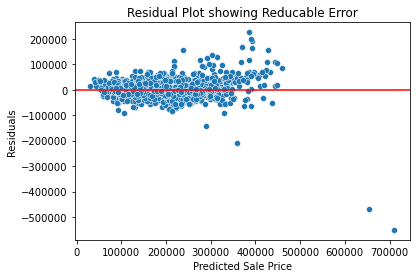

In [165]:
# Plot residuals to evaluate Epsilon (irreducable error)

plt.axhline(y=0, color='r')
sns.scatterplot(x = preds, y = residuals)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot showing Reducable Error');

191.02241884886143

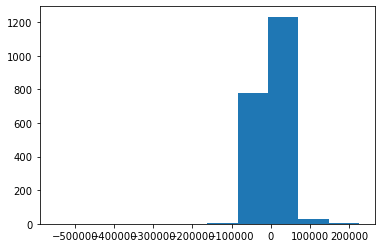

In [166]:
# Hist of residuals
plt.hist(residuals)
residuals.mean()

In [167]:
# Invesitage Outliers
residuals.sort_values()

960    -550856.420237
1885   -469272.135399
125    -208252.132407
348    -141747.287921
1628    -91939.987202
            ...      
151     163352.987442
823     168626.464479
1796    190830.158913
1964    200585.142863
1671    225631.254612
Name: saleprice, Length: 2051, dtype: float64

In [168]:
# Lookup Outliers in X or df
X.loc[[125, 960, 156, 1885, 339]]
df.loc[[125, 960, 156, 1885, 339]]

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_cond_num,bsmt_exposure,bsmt_exposure_num,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_qual_num,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_1_num,bsmtfin_type_2,bsmtfin_type_2_num,central_air,condition_1,condition_2,electrical,electrical_num,enclosed_porch,exter_cond,exter_cond_num,exter_qual,exter_qual_num,exterior_1st,exterior_2nd,fence,fence_num,fireplace_qu,fireplace_qu_num,fireplaces,foundation,full_bath,functional,functional_num,garage_area,garage_cars,garage_cond,garage_cond_num,garage_finish,garage_qual,garage_qual_num,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,heating_qc_num,house_style,id,kitchen_abvgr,kitchen_qual,kitchen_qual_num,land_contour,land_slope,land_slope_num,lot_area,lot_config,lot_frontage,lot_shape,lot_shape_num,low_qual_fin_sf,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,ms_subclass,ms_zoning,neighborhood,open_porch_sf,overall_cond,overall_qual,paved_drive,paved_drive_num,pid,pool_area,pool_qc,pool_qc_num,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,total_bsmt_sf,totrms_abvgrd,utilities,utilities_num,wood_deck_sf,year_built,year_remod/add,yr_sold,overall_qual_squared,quality_and_age,house_total_sq,sqrt_1st_sq,overall_qual_liv_area,year_remod_or_built,kitch_qual_and_age,year_remod_or_built_sq,exterior_cond_and_qual
125,1599,1345,0,2,3,0,TA,3.0,No,2.0,0.0,0.0,Gd,4.0,584.0,410.0,0.0,GLQ,6.0,Unf,1.0,1,2,2,4,NaN,16,Gd,4,Gd,4,13,13,NaN,NaN,Gd,4.000000,1,1,2,Typ,7,864.0,3.0,TA,3.0,1,TA,3.0,1,1977.0,2944,2,0,TA,3,5,1183,1,Gd,4,3,Gtl,2,24572,1,69.0552,IR1,2,0,1050.0,1,5,0,6,60,5,27,70,3,9,Y,2,533350090,0,NaN,NaN,1,4,8,150000,0,1,994.0,9,AllPub,3,140,1977,1977,2008,81,17793,3938.0,2556801,26496,3908529,GdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGd...,15276598943841,16
960,4692,950,0,2,3,0,TA,3.0,Gd,5.0,2.0,0.0,Ex,5.0,466.0,5644.0,0.0,GLQ,6.0,Unf,1.0,1,1,2,4,NaN,0,TA,3,Ex,5,11,11,NaN,NaN,Gd,4.000000,3,2,2,Typ,7,1418.0,2.0,TA,3.0,0,TA,3.0,1,2008.0,5642,1,0,Ex,5,5,1499,1,Ex,5,0,Gtl,2,63887,0,313.0000,IR3,0,0,796.0,3,5,0,1,60,5,7,292,5,10,Y,2,908154235,480,Gd,4.0,0,3,6,160000,0,1,6110.0,12,AllPub,3,214,2008,2008,2008,100,20080,11752.0,22014864,56420,4032064,ExExExExExExExExExExExExExExExExExExExExExExEx...,16257540100096,15
156,1204,0,0,2,2,4,TA,3.0,No,2.0,0.0,0.0,Gd,4.0,1191.0,0.0,0.0,Unf,1.0,Unf,1.0,1,2,2,4,NaN,0,TA,3,TA,3,6,6,NaN,NaN,NaN,3.441484,0,1,2,Typ,7,461.0,2.0,TA,3.0,1,TA,3.0,1,1987.0,1204,0,0,TA,3,2,2327,1,TA,3,3,Gtl,2,3701,4,30.0000,IR1,2,0,0.0,2,5,0,8,120,5,25,70,5,8,Y,2,527182020,0,NaN,NaN,1,1,8,130000,0,1,1191.0,5,AllPub,3,120,1987,1987,2006,64,15896,2395.0,1449616,9632,3948169,TATATATATATATATATATATATATATATATATATATATATATATA...,15588038452561,9
1885,5095,0,0,2,2,0,TA,3.0,Gd,5.0,1.0,1.0,Ex,5.0,1085.0,4010.0,0.0,GLQ,6.0,Unf,1.0,1,2,2,4,NaN,0,TA,3,Ex,5,5,5,NaN,NaN,Gd,4.000000,2,2,2,Typ,7,1154.0,3.0,TA,3.0,0,TA,3.0,1,2008.0,5095,1,0,Ex,5,2,2181,1,Ex,5,0,Gtl,2,39290,4,128.0000,IR1,2,0,1224.0,3,0,17000,10,20,5,7,484,5,10,Y,2,908154195,0,NaN,NaN,1,3,6,183850,0,1,5095.0,15,AllPub,3,546,2008,2009,2007,100,20090,10190.0,25959025,50950,4034072,ExExExExExExExExExExExExExExExExExExExExExExEx...,16273736901184,15
339,1088,0,0,2,2,4,TA,3.0,No,2.0,0.0,0.0,Gd,4.0,1074.0,0.0,0.0,Unf,1.0,Unf,1.0,1,2,2,4,NaN,137,TA,3,Gd,4,6,6,NaN,NaN,NaN,3.441484,0,1,1,Typ,7,461.0,2.0,TA,3.0,1,TA,3.0,1,1987.0,1088,1,0,Ex,5,2,1632,1,Gd,4,3,Gtl,2,3696,4,69.0552,Reg,3,0,0.0,2,5,0,10,120,5,25,74,5,8,Y,2,527182040,0,NaN,NaN,1,1,8,170000,0,1,1074.0,5,AllPub,3,0,1986,1986,2007,64,15888,2162.0,1183744,8704,3944196,GdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGd...,15556682086416,12


In [169]:
df_test.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_cond_num,bsmt_exposure,bsmt_exposure_num,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_qual_num,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_1_num,bsmtfin_type_2,bsmtfin_type_2_num,central_air,condition_1,condition_2,electrical,electrical_num,enclosed_porch,exter_cond,exter_cond_num,exter_qual,exter_qual_num,exterior_1st,exterior_2nd,fence,fence_num,fireplace_qu,fireplace_qu_num,fireplaces,foundation,full_bath,functional,functional_num,garage_area,garage_cars,garage_cond,garage_cond_num,garage_finish,garage_qual,garage_qual_num,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,heating_qc_num,house_style,id,kitchen_abvgr,kitchen_qual,kitchen_qual_num,land_contour,land_slope,land_slope_num,lot_area,lot_config,lot_frontage,lot_shape,lot_shape_num,low_qual_fin_sf,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,ms_subclass,ms_zoning,neighborhood,open_porch_sf,overall_cond,overall_qual,paved_drive,paved_drive_num,pid,pool_area,pool_qc,pool_qc_num,roof_matl,roof_style,sale_type,screen_porch,street,total_bsmt_sf,totrms_abvgrd,utilities,utilities_num,wood_deck_sf,year_built,year_remod/add,yr_sold,overall_qual_squared,quality_and_age,house_total_sq,sqrt_1st_sq,overall_qual_liv_area,year_remod_or_built,kitch_qual_and_age,year_remod_or_built_sq,exterior_cond_and_qual
0,908,1020,0,0,4,1,TA,3.0,No,2.0,0,0,Fa,2.0,1020,0,0,Unf,1.0,Unf,1.0,0,2,1,2,NaN,112,Fa,2,TA,3,0,0,NaN,NaN,NaN,3.434211,0,4,2,Typ,7,440,1,Po,1.0,2,Po,1.0,5,1910.0,1928,0,1,Gd,4,5,2658,2,Fa,2,3,Gtl,2,9142,4,69.000000,Reg,3,0,0.0,3,3,0,4,190,5,18,60,8,6,Y,2,902301120,0,NaN,NaN,0,1,9,0,1,1020,9,AllPub,3,0,1910,1950,2006,36,11700,2948,824464,11568,3724500,FaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFa...,13871900250000,6
1,1967,0,0,2,6,2,TA,3.0,No,2.0,0,0,Gd,4.0,1967,0,0,Unf,1.0,Unf,1.0,1,2,1,3,NaN,0,TA,3,TA,3,7,10,NaN,NaN,NaN,3.434211,0,1,2,Typ,7,580,2,TA,3.0,0,TA,3.0,1,1977.0,1967,0,1,TA,3,2,2718,2,TA,3,3,Gtl,2,9662,4,69.545961,IR1,2,0,0.0,3,3,0,8,90,4,20,0,4,5,Y,2,905108090,0,NaN,NaN,0,1,9,0,1,1967,10,AllPub,3,170,1977,1977,2006,25,9885,3934,3869089,9835,3908529,TATATATATATATATATATATATATATATATATATATATATATATA...,15276598943841,9
2,664,832,0,2,3,0,Gd,4.0,Av,4.0,1,0,Gd,4.0,100,554,0,GLQ,6.0,Unf,1.0,1,2,1,3,NaN,0,TA,3,Gd,4,10,13,NaN,NaN,Gd,4.000000,1,2,2,Typ,7,426,2,TA,3.0,1,TA,3.0,1,2006.0,1496,1,1,Ex,5,5,2414,1,Gd,4,3,Gtl,2,17104,4,58.000000,IR1,2,0,0.0,3,3,0,9,60,4,8,24,5,7,Y,2,528218130,0,NaN,NaN,0,1,6,0,1,654,7,AllPub,3,100,2006,2006,2006,49,14042,2150,440896,10472,4024036,GdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGd...,16192865729296,12
3,968,0,0,2,2,0,TA,3.0,No,2.0,0,0,TA,3.0,968,0,0,Unf,1.0,Unf,1.0,1,2,1,3,NaN,184,TA,3,Gd,4,11,14,NaN,NaN,NaN,3.434211,0,1,1,Typ,7,480,2,TA,3.0,2,Fa,2.0,5,1935.0,968,0,1,TA,3,2,1989,1,TA,3,3,Gtl,2,8520,4,60.000000,Reg,3,0,0.0,3,3,0,7,30,5,18,0,6,5,N,0,902207150,0,NaN,NaN,0,1,9,0,1,968,5,AllPub,3,0,1923,2006,2007,25,10030,1936,937024,4840,3857538,TATATATATATATATATATATATATATATATATATATATATATATA...,14880599421444,12
4,1394,0,0,2,3,0,TA,3.0,No,2.0,1,0,Gd,4.0,785,609,0,BLQ,4.0,Unf,1.0,1,2,1,3,NaN,0,TA,3,TA,3,7,10,NaN,NaN,Gd,4.000000,2,1,1,Typ,7,514,2,TA,3.0,1,TA,3.0,1,1963.0,1394,1,1,Gd,4,2,625,1,TA,3,3,Gtl,2,9500,4,69.545961,IR1,2,0,247.0,1,3,0,7,20,4,13,76,5,6,Y,2,535105100,0,NaN,NaN,0,1,9,185,1,1394,6,AllPub,3,0,1963,1963,2009,36,11778,2788,1943236,8364,3853369,TATATATATATATATATATATATATATATATATATATATATATATA...,14848452650161,9


In [170]:
df.shape

(2051, 110)

In [171]:
df_test.shape

(878, 109)

In [172]:
test_preds = lr.predict(df_test[features])

df_test['SalePrice'] = test_preds

df_test.rename(columns={'id': 'Id'}, inplace=True)

kaggle_submission = df_test[['Id', 'SalePrice']]

kaggle_submission.set_index('Id', inplace=True)

In [173]:
df_test.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_cond_num,bsmt_exposure,bsmt_exposure_num,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_qual_num,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_1_num,bsmtfin_type_2,bsmtfin_type_2_num,central_air,condition_1,condition_2,electrical,electrical_num,enclosed_porch,exter_cond,exter_cond_num,exter_qual,exter_qual_num,exterior_1st,exterior_2nd,fence,fence_num,fireplace_qu,fireplace_qu_num,fireplaces,foundation,full_bath,functional,functional_num,garage_area,garage_cars,garage_cond,garage_cond_num,garage_finish,garage_qual,garage_qual_num,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,heating_qc_num,house_style,Id,kitchen_abvgr,kitchen_qual,kitchen_qual_num,land_contour,land_slope,land_slope_num,lot_area,lot_config,lot_frontage,lot_shape,lot_shape_num,low_qual_fin_sf,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,ms_subclass,ms_zoning,neighborhood,open_porch_sf,overall_cond,overall_qual,paved_drive,paved_drive_num,pid,pool_area,pool_qc,pool_qc_num,roof_matl,roof_style,sale_type,screen_porch,street,total_bsmt_sf,totrms_abvgrd,utilities,utilities_num,wood_deck_sf,year_built,year_remod/add,yr_sold,overall_qual_squared,quality_and_age,house_total_sq,sqrt_1st_sq,overall_qual_liv_area,year_remod_or_built,kitch_qual_and_age,year_remod_or_built_sq,exterior_cond_and_qual,SalePrice
0,908,1020,0,0,4,1,TA,3.0,No,2.0,0,0,Fa,2.0,1020,0,0,Unf,1.0,Unf,1.0,0,2,1,2,NaN,112,Fa,2,TA,3,0,0,NaN,NaN,NaN,3.434211,0,4,2,Typ,7,440,1,Po,1.0,2,Po,1.0,5,1910.0,1928,0,1,Gd,4,5,2658,2,Fa,2,3,Gtl,2,9142,4,69.000000,Reg,3,0,0.0,3,3,0,4,190,5,18,60,8,6,Y,2,902301120,0,NaN,NaN,0,1,9,0,1,1020,9,AllPub,3,0,1910,1950,2006,36,11700,2948,824464,11568,3724500,FaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFaFa...,13871900250000,6,119706.653839
1,1967,0,0,2,6,2,TA,3.0,No,2.0,0,0,Gd,4.0,1967,0,0,Unf,1.0,Unf,1.0,1,2,1,3,NaN,0,TA,3,TA,3,7,10,NaN,NaN,NaN,3.434211,0,1,2,Typ,7,580,2,TA,3.0,0,TA,3.0,1,1977.0,1967,0,1,TA,3,2,2718,2,TA,3,3,Gtl,2,9662,4,69.545961,IR1,2,0,0.0,3,3,0,8,90,4,20,0,4,5,Y,2,905108090,0,NaN,NaN,0,1,9,0,1,1967,10,AllPub,3,170,1977,1977,2006,25,9885,3934,3869089,9835,3908529,TATATATATATATATATATATATATATATATATATATATATATATA...,15276598943841,9,215095.731096
2,664,832,0,2,3,0,Gd,4.0,Av,4.0,1,0,Gd,4.0,100,554,0,GLQ,6.0,Unf,1.0,1,2,1,3,NaN,0,TA,3,Gd,4,10,13,NaN,NaN,Gd,4.000000,1,2,2,Typ,7,426,2,TA,3.0,1,TA,3.0,1,2006.0,1496,1,1,Ex,5,5,2414,1,Gd,4,3,Gtl,2,17104,4,58.000000,IR1,2,0,0.0,3,3,0,9,60,4,8,24,5,7,Y,2,528218130,0,NaN,NaN,0,1,6,0,1,654,7,AllPub,3,100,2006,2006,2006,49,14042,2150,440896,10472,4024036,GdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGdGd...,16192865729296,12,192005.925674
3,968,0,0,2,2,0,TA,3.0,No,2.0,0,0,TA,3.0,968,0,0,Unf,1.0,Unf,1.0,1,2,1,3,NaN,184,TA,3,Gd,4,11,14,NaN,NaN,NaN,3.434211,0,1,1,Typ,7,480,2,TA,3.0,2,Fa,2.0,5,1935.0,968,0,1,TA,3,2,1989,1,TA,3,3,Gtl,2,8520,4,60.000000,Reg,3,0,0.0,3,3,0,7,30,5,18,0,6,5,N,0,902207150,0,NaN,NaN,0,1,9,0,1,968,5,AllPub,3,0,1923,2006,2007,25,10030,1936,937024,4840,3857538,TATATATATATATATATATATATATATATATATATATATATATATA...,14880599421444,12,130789.880153
4,1394,0,0,2,3,0,TA,3.0,No,2.0,1,0,Gd,4.0,785,609,0,BLQ,4.0,Unf,1.0,1,2,1,3,NaN,0,TA,3,TA,3,7,10,NaN,NaN,Gd,4.000000,2,1,1,Typ,7,514,2,TA,3.0,1,TA,3.0,1,1963.0,1394,1,1,Gd,4,2,625,1,TA,3,3,Gtl,2,9500,4,69.545961,IR1,2,0,247.0,1,3,0,7,20,4,13,76,5,6,Y,2,535105100,0,NaN,NaN,0,1,9,185,1,1394,6,AllPub,3,0,1963,1963,2009,36,11778,2788,1943236,8364,3853369,TATATATATATATATATATATATATATATATATATATATATATATA...,14848452650161,9,176252.456045


In [174]:
# Save Submission to CSV
kaggle_submission.to_csv(f'../../kaggle_submissions/model{modelnum}.csv')